Bu projede sıtma hastalığının teşisi için model geliştirilmiştir.

The dataset contains 2 folders

Infected

Uninfected

And a total of 27,558 images.

<a href='https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria' target=_blank> Data dosyasını buradaki linkten indirebilirsiniz.




# Kütüphaneleri import ettik

In [ ]:
import cv2
import pandas as pd
import os 
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Dropout
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D, Dropout, BatchNormalization, Reshape

# Klasörümüzü okuduk

In [21]:
labels=['Parasitized','Uninfected'] 
img_path='cell_images/'

# Liste oluşturup verilerimizi ekledik

In [22]:
img_list=[]
label_list=[]
for label in labels:
    for img_file in os.listdir(img_path+label):
        img_list.append(img_path + label + '/' + img_file)
        label_list.append(label)

# DataFrame oluşturuyoruz

In [23]:
df = pd.DataFrame({'img': img_list, 'label': label_list})
df = df[~df['img'].str.contains('.DS_Store')]

In [24]:
df.head()

,img,label
0,cell_images/Parasitized/C118P79ThinF_IMG_20151...,Parasitized
1,cell_images/Parasitized/C189P150ThinF_IMG_2015...,Parasitized
2,cell_images/Parasitized/C91P52ThinF_IMG_201508...,Parasitized
3,cell_images/Parasitized/C84P45ThinF_IMG_201508...,Parasitized
4,cell_images/Parasitized/C144P105ThinF_IMG_2015...,Parasitized


In [25]:
df.tail()

,img,label
27555,cell_images/Uninfected/C206ThinF_IMG_20151029_...,Uninfected
27556,cell_images/Uninfected/C204ThinF_IMG_20151029_...,Uninfected
27557,cell_images/Uninfected/C145P106ThinF_IMG_20151...,Uninfected
27558,cell_images/Uninfected/C112P73ThinF_IMG_201509...,Uninfected
27559,cell_images/Uninfected/C212ThinF_IMG_20151106_...,Uninfected


# Verileri sayısal hale getiriyoruz

In [26]:
d={'Parasitized':1,'Uninfected':0}

# label sütununu 1 ve 0 olarak güncelliyoruz

In [27]:
df['encode_label']=df['label'].map(d)

In [28]:
df.tail()

,img,label,encode_label
27555,cell_images/Uninfected/C206ThinF_IMG_20151029_...,Uninfected,0
27556,cell_images/Uninfected/C204ThinF_IMG_20151029_...,Uninfected,0
27557,cell_images/Uninfected/C145P106ThinF_IMG_20151...,Uninfected,0
27558,cell_images/Uninfected/C112P73ThinF_IMG_201509...,Uninfected,0
27559,cell_images/Uninfected/C212ThinF_IMG_20151106_...,Uninfected,0


# Görüntüyü okuyup normalize ettik

In [29]:
x = []
for img_path in df['img']:
    img = cv2.imread(img_path)
    if img is None:
        print(f"Bozuk veya okunamayan görüntü: {img_path}") # Projemiz içinde bozuk görüntüler vardı onları atlayıp devam ettik
        continue  # Bozuk görüntüyü atla
    img = cv2.resize(img, (170, 170))  # boyutunu 170x170 yaptık
    img = img / 255.0  # normalize ettik
    x.append(img)


# x listesini arraye dönüştürdü

In [30]:
x=np.array(x)

# encode_label sütununu y ye atadık

In [31]:
y=df['encode_label']

# eğitim ve test verilerine ayırıp train test split yaptık

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

# DNN modeli oluşturduk

In [35]:
model = Sequential()
model.add(Input(shape=(170, 170, 3)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  # %25 Dropout ekledik

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  # %25 Dropout ekledik

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # %50 Dropout ekledik amaç overfittingi engellemek    
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Modeli eğittik

In [36]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=50, verbose=1)

Epoch 1/50
689/689 ━━━━━━━━━━━━━━━━━━━━ 117s 169ms/step - accuracy: 0.6736 - loss: 0.8572 - val_accuracy: 0.9294 - val_loss: 0.2076
Epoch 2/50
689/689 ━━━━━━━━━━━━━━━━━━━━ 103s 150ms/step - accuracy: 0.9262 - loss: 0.2417 - val_accuracy: 0.9369 - val_loss: 0.1980
Epoch 3/50
689/689 ━━━━━━━━━━━━━━━━━━━━ 102s 148ms/step - accuracy: 0.9384 - loss: 0.1933 - val_accuracy: 0.9374 - val_loss: 0.1866
Epoch 4/50
689/689 ━━━━━━━━━━━━━━━━━━━━ 102s 148ms/step - accuracy: 0.9392 - loss: 0.1683 - val_accuracy: 0.9394 - val_loss: 0.2180
Epoch 5/50
689/689 ━━━━━━━━━━━━━━━━━━━━ 106s 153ms/step - accuracy: 0.9423 - loss: 0.1643 - val_accuracy: 0.9298 - val_loss: 0.1749
Epoch 6/50
689/689 ━━━━━━━━━━━━━━━━━━━━ 105s 152ms/step - accuracy: 0.9466 - loss: 0.1404 - val_accuracy: 0.9291 - val_loss: 0.1882
Epoch 7/50
689/689 ━━━━━━━━━━━━━━━━━━━━ 102s 148ms/step - accuracy: 0.9517 - loss: 0.1379 - val_accuracy: 0.9347 - val_loss: 0.2091
Epoch 8/50
689/689 ━━━━━━━━━━━━━━━━━━━━ 102s 148ms/step - accuracy: 0.9528 -

# Modelin grafiğini çizdik

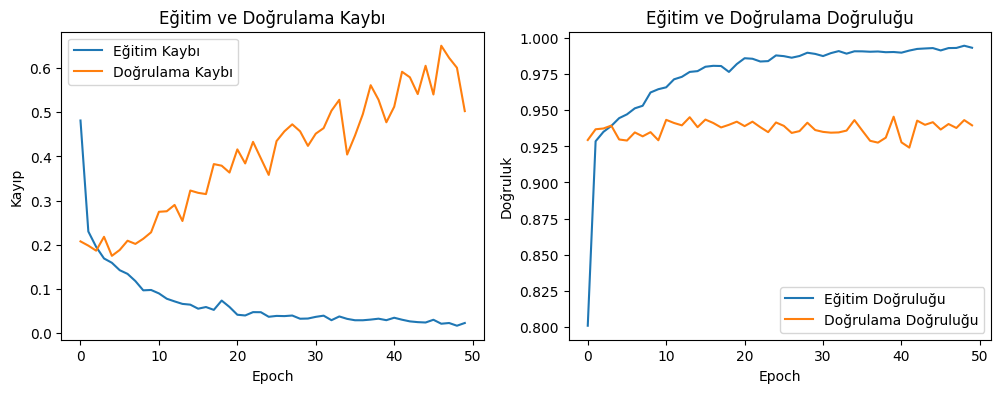

In [38]:
# Modelin eğitim ve doğrulama kaybını ve doğruluğunu çiz
plt.figure(figsize=(12, 4))

# Kayıp grafiği
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.title('Eğitim ve Doğrulama Kaybı')

# Doğruluk grafiği
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.title('Eğitim ve Doğrulama Doğruluğu')

plt.show()


# Sonuç